In [1]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from tqdm import tqdm

result = pd.read_csv("covid.train.csv")
keys = list(result.columns.values)

    
#turn into tensor
a = torch.FloatTensor(result.iloc[0][0:82])
b = torch.FloatTensor(result.iloc[0][82:])
result = pd.DataFrame.to_numpy(result)
result = torch.FloatTensor(result)
#standardize
temp = result[:,0:40]
temp2 = result[:,40:-1]
temp3 = result[:,-1:]
# temp2 = (temp2 - torch.min(temp2,0)[0]) / (torch.max(temp2,0)[0] - torch.min(temp2,0)[0])
# temp2 = result[40:43]
# result = torch.cat((temp,temp2,temp3),1)

# # data = [ np.concatenate((temp[i],temp2[i]),axis = 0) for i in range(2700)]

In [3]:
# new_data = []
# new_keys = []
# show_corre = 0
# for i in range(temp2.shape[1]):
    
#     show_corre = np.corrcoef(temp2[:,i],temp3.squeeze())
#     correlation = np.corrcoef(temp2[:,i],temp3.squeeze())[0][1]
#     if correlation > 0.35 or correlation < -0.35:
#         new_keys.append(keys[i+40])
#         temp = torch.cat((temp,torch.unsqueeze(temp2[:,i],1)),1)
        
# temp = torch.cat((temp,temp3),1)
# result = temp
ind = [40+18*0, 41+18*0, 42+18*0, 43+18*0, 46+18*0, 50+18*0, 51+18*0, 57+18*0,
                     40+18*1, 41+18*1, 42+18*1, 43+18*1, 46+18*1, 50+18*1, 51+18*1, 57+18*1,
                     40+18*2, 41+18*2, 42+18*2, 43+18*2, 46+18*2, 50+18*2, 51+18*2]
print(result.shape)

for i in range(len(ind)):
    tem = result[:,ind[i]]
    tem = torch.unsqueeze(tem,1)
#     print(tem.shape)
    temp = torch.cat((temp , tem),1)
# plt.scatter(temp2[:,5],temp3)
result = temp[:,40:]

torch.Size([2700, 95])


In [17]:
lr = 0.0005
batch_size = 27
epochs = 300
device = "cpu"

In [18]:
class MyDataset(Dataset):
    def __init__(self, file):
        self.data = file

    def __getitem__(self,index): 
        
        train_data = self.data[index,0:56]
#         print(train_data.shape)
        train_target = self.data[index,-1:]
#         print(train_target)
        return train_data, train_target
    
    
    def __len__(self):
        return len(self.data)


class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(23, 24),
            nn.ReLU(),
            nn.Linear(24,1),
#             nn.ReLU(),
#             nn.Linear(16,1)
            
        )
    def forward(self, x):
        return self.net(x).squeeze()
        

100%|██████████| 300/300 [00:28<00:00, 10.56it/s]


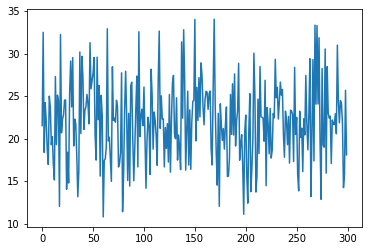

18.09430503845215


In [19]:
dataset = MyDataset(result)
dataloader = DataLoader(dataset, batch_size, shuffle=True)
model = MyModel().to(device)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay= 0.0001)

loss_con = []
loss_record = []
epoch_number = 0
trigger = 0
trigger_2 = 0
average_loss_list = []

for epoch in tqdm(range(epochs)):
    model.train()
    epoch_loss = 0
    
    for x,y in dataloader: #attention
        optimizer.zero_grad()
#         print(y.shape)
#         print(y)
        x, y = x.to(device), y.to(device)
#         print(x.shape)
#         print(y.shape)
        pred = model(x)
#         print(model.weight)

        loss = criterion(pred, y)
        epoch_loss += loss.item()
        loss.backward()
        optimizer.step()
        
    epoch_number = epoch_number + 1
    
    if (epoch_loss < 70000) and (trigger == 0):
        trigger = 1
        loss_con.append(epoch_loss)
    elif (trigger == 1):
        loss_con.append(epoch_loss)
    elif (epoch_loss > 70000) and (trigger == 0):
        pass
    loss_record.append(loss.detach().cpu().item())
#     print(loss_record)
plt.plot(loss_record)
plt.show()
print(loss_record[-1])

In [21]:
model.eval()
total_loss = 0
pred_results = []
final_loss = []

for x,y in dataloader:
    x = x.to(device)
#     print(x.shape)
    epoch_final_loss = 0
    
    with torch.no_grad():
#         print(x.shape)
#         print(x)
#         print(x[-1])
        predict = model(x)
#         print(predict)
    pred_results.append(predict.cpu())

    loss_final = criterion(predict, y)
    epoch_final_loss += loss_final.item()

    print(epoch_final_loss)
    final_loss.append(epoch_final_loss)

print(pred_results)

22.976476669311523
18.734304428100586
15.290390968322754
14.954919815063477
24.75560760498047
27.630186080932617
23.844913482666016
18.743576049804688
14.254207611083984
21.80487060546875
19.107707977294922
29.31972885131836
26.400230407714844
20.50563621520996
23.771404266357422
19.79792022705078
21.09011459350586
22.827547073364258
18.033082962036133
19.916109085083008
20.288354873657227
21.773937225341797
18.929889678955078
15.093567848205566
22.28577995300293
12.929495811462402
30.49323272705078
20.220195770263672
21.457359313964844
28.847490310668945
21.700706481933594
26.548519134521484
21.540468215942383
23.89390754699707
23.351272583007812
23.179136276245117
21.562313079833984
18.233434677124023
11.045510292053223
28.230426788330078
29.664379119873047
29.591665267944336
20.61794090270996
20.486356735229492
18.66066551208496
21.56462287902832
24.723087310791016
22.7499942779541
25.017047882080078
27.168359756469727
26.298763275146484
23.64263343811035
19.852384567260742
22.85105